# Overfitting

Overfitting in the case of polynomial regression, from chapter 8

In [1]:
## Illustrates overfitting by fitting data with polynomials of
# higher and higher order.

# The true model is y = f^*(x) + u where u is normal with zero
# mean and standard deviation sigma, and f^* is as below.  The
# variable x is drawn IID from U[-1,1]
sigma <- 0.5
fstar <- function(x) return(cos(pi * x))

# Function to generate n input/output pairs
sample_pairs <- function(n) {
    inputs <- runif(n, min=-1, max=1)
    shocks <- sigma * rnorm(n)
    outputs <- fstar(inputs) + shocks
    return(list(x=inputs, y=outputs))
}

# Map vector x_i into matrix x_i^j where j=1,...,d
Phi <- function(x, d) {
    n <- length(x)
    P <- matrix(nrow=n, ncol=(d+1))
    for (i in 1:n) P[i,] <- x[i]^(0:d)
    return(P)
}


# Vectorized polynomial function
polynom <- function(xvec, coefficients) {
    D <- length(coefficients) - 1  # Degree of polynomial
    return(Phi(xvec, D) %*% coefficients)
}

# Compute risk of polynomial.  The integration is w.r.t the 
# uniform density on [-1,1], which explains division by 2.
risk <- function(coefficients) {
    g <- function(s) return((polynom(s, coefficients) - fstar(s))^2)
    return(sigma^2 + integrate(g, -1, 1)$value/2)
}
N <- 35
set.seed(1111)
data <- sample_pairs(N)  # Observed data

grid_size <- 200; xmin <- -1; xmax <- 1
x_grid <- seq(xmin, xmax, length=grid_size)

# For d in 1:D, fit a polynomial of degree d to data, and
# compute the risk and empirical risk

D <- 10
risks <- numeric(D)
emp.risks <- numeric(D)
    
for (d in 1:15) {
    # Fit polynomial of degree d
    Phimat <- Phi(data$x, d)
    gammahat <- solve(t(Phimat) %*% Phimat) %*% t(Phimat) %*% data$y
    resid <- data$y - Phimat %*% gammahat
    emp.risks[d] <- sum(resid * resid) / N
    risks[d] <- risk(gammahat)
    plot(x_grid, cos(pi * x_grid), type="l", xlab=paste("degree =", d), ylab="", main="")
    points(data$x, data$y)
    lines(x_grid, polynom(x_grid, gammahat), col="red")
    dev.off()
}

null device 
          1

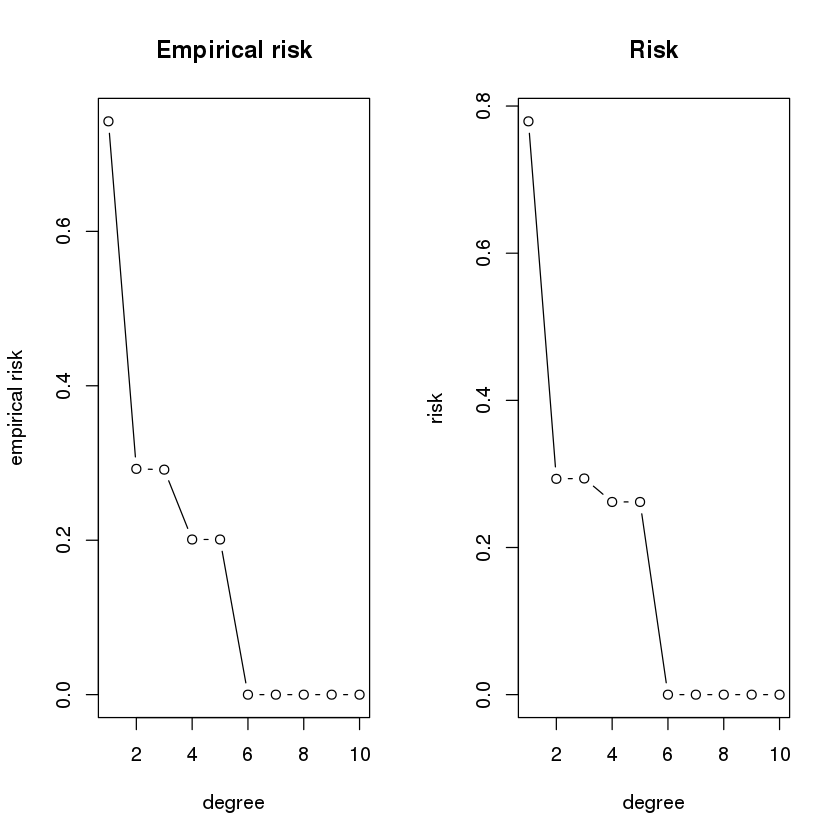

In [2]:

par(mfrow=c(1,2))
plot(emp.risks, type="b", xlab="degree", ylab="empirical risk",
    main="Empirical risk")
plot(risks, type="b", xlab="degree", ylab="risk", main="Risk")
dev.off()